In [2]:
import pandas as pd

In [3]:
#def make_data():
sales = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/opioidPrescriptionSales.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/drugPoisoningDeaths.csv")


In [ ]:

def make_sales():
    sales = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/opioidPrescriptionSales.csv")
    sales['Type'] = sales['Oxycodone / Hydrocodone'].str.replace('/', '')
    #sales['Data Type'] = sales['Data Type'].str.replace('  ', '_')
    sales = sales[["Fips", "Location","TimeFrame","Type", "Data", ]]
    sales= sales.query("TimeFrame == 2018 and Type == 'Hydrocodone'")
    sales = sales.groupby("Data").median().reset_index()
    #sales.query("TimeFrame == 2018")
    #return sales.query("TimeFrame == 2018 and Type == 'Oxycodone'")
    sales = sales.rename(columns={"Data":"Sales Data"})
    return sales
make_sales()


In [ ]:
def make_deaths():
    deaths = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/drugPoisoningDeaths.csv")
    #sales['Type'] = sales['Oxycodone / Hydrocodone'].str.replace('/', '')
    #sales['Data Type'] = sales['Data Type'].str.replace('  ', '_')
    deaths = deaths[["Fips", "Location","TimeFrame","Drug Type", "Data", ]]
    deaths= deaths.query("TimeFrame == 2018") #and 'Drug Type' == 'All opioids')
    
    deaths= deaths.query("`Drug Type` == 'All opioids'")
    deaths = deaths.groupby("Data").median().reset_index()
    #grouped = deaths.groupby(pd.qcut(deaths['Data'], q=10))#.reset_index()
    #sales.query("TimeFrame == 2018")
    #return sales.query("TimeFrame == 2018 and Type == 'Oxycodone'")
    deaths = deaths.rename(columns={"Data":"Deaths Data"})
    #grouped = grouped.rename(columns={"Data":"Deaths Data"})
    return deaths
make_deaths()

In [6]:
def make_merge():
    sales = make_sales()
    deaths = make_deaths()
    merged = deaths.merge(sales, on="Fips")
    
    return merged
make_merge()

df= make_merge()
import seaborn as sns

<AxesSubplot:xlabel='Sales Data', ylabel='Deaths Data'>

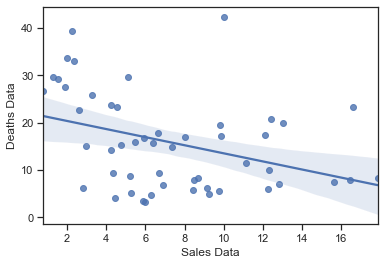

In [7]:
sns.regplot(data=df, x="Sales Data", y="Deaths Data")

In [ ]:
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style="ticks")
sns.lmplot(x="Sales Data", y="Deaths Data", data=df)

# Calculate the predicted values
predicted_values = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, predicted_values)

# Calculate mean squared error
mse = mean_squared_error(y, predicted_values)

print("R-squared:", r2)
print("MSE:", mse)